# Libraries

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from PIL import Image

# Question 2

In [55]:
# Init dataframes
df_question_2 = pd.DataFrame(columns=['A', 'B', 'and', 'or', 'xor', 'nand'], 
                             data=np.array([[0, 0, 0, 0, 0, 1], [1, 0, 0, 1, 1, 1], [0, 1, 0, 1, 1, 1], [1, 1, 1, 1, 0, 0]]))

print('Data Frame for Question 2:')
print(df_question_2)
print('\n-----------------------------------------------------\n')

# Fit logistic regression model to data above
for column in ['and', 'or', 'xor', 'nand']:
    # Fit model
    model = LogisticRegression()
    model.fit(df_question_2[['A', 'B']], df_question_2[column])

    # Print accuracy
    print(f"Logistic Regression '{column}' accuracy: {model.score(df_question_2[['A', 'B']], df_question_2[column])}")

print('\n-----------------------------------------------------\n')
# Fit Support Vector Machine to data above
for column in ['and', 'or', 'xor', 'nand']:
    # Fit model
    model = SVC()
    model.fit(df_question_2[['A', 'B']], df_question_2[column])

    # Print accuracy
    print(f"Support Vector Machine '{column}' accuracy: {model.score(df_question_2[['A', 'B']], df_question_2[column])}")

print('\n-----------------------------------------------------')


Data Frame for Question 2:
   A  B  and  or  xor  nand
0  0  0    0   0    0     1
1  1  0    0   1    1     1
2  0  1    0   1    1     1
3  1  1    1   1    0     0

-----------------------------------------------------

Logistic Regression 'and' accuracy: 0.75
Logistic Regression 'or' accuracy: 0.75
Logistic Regression 'xor' accuracy: 0.5
Logistic Regression 'nand' accuracy: 0.75

-----------------------------------------------------

Support Vector Machine 'and' accuracy: 1.0
Support Vector Machine 'or' accuracy: 1.0
Support Vector Machine 'xor' accuracy: 1.0
Support Vector Machine 'nand' accuracy: 1.0

-----------------------------------------------------


#### Explination:

Logistic regression can NOT learn **XOR** because it is not linearly seperable. 

# Question 3

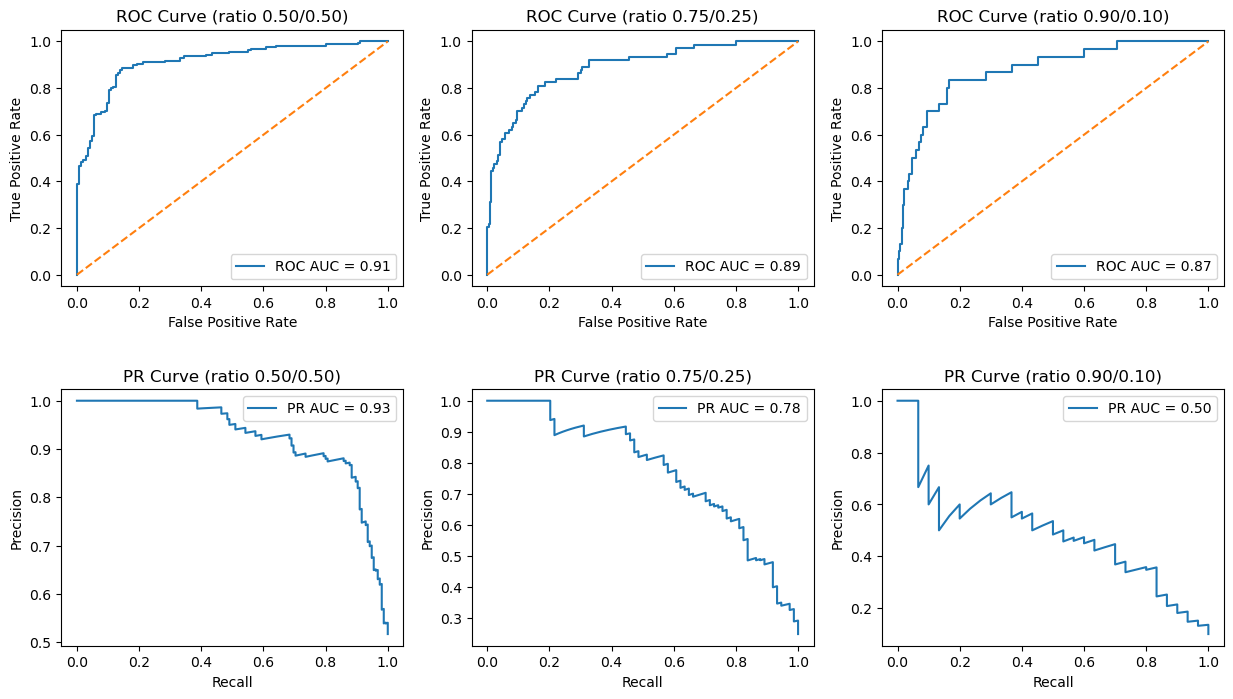

In [56]:
ratios = [(0.5, 0.5), (0.75, 0.25), (0.9, 0.1)]
datasets = [make_classification(n_samples=1000, weights=ratio, random_state=42) for ratio in ratios]

# Set figure size
plt.figure(figsize=(15, 8))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.subplot(2, len(ratios), i + 1)
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (ratio {ratios[i][0]:.2f}/{ratios[i][1]:.2f})')
    plt.legend(loc='lower right')

    # Plot PR curve
    plt.subplot(2, len(ratios), i + 1 + len(ratios))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR Curve (ratio {ratios[i][0]:.2f}/{ratios[i][1]:.2f})')
    plt.legend(loc='upper right')

# Add some space between the subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

#### Summarization of findings

1. Balanced dataset (50/50):

    - ROC curve: The curve shows a reasonable trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) for different thresholds. The ROC AUC is relatively high, indicating good classifier performance.
    - PR curve: The curve also exhibits a reasonable trade-off between precision and recall. The PR AUC is high, reflecting the classifier's ability to accurately predict the positive class. The baseline precision (determined by the proportion of positive samples) is around 0.5.

<br />
    
2. Moderately imbalanced dataset (75/25):

    - ROC curve: The curve still appears reasonable, but the AUC starts to be less informative as the curve may be dominated by the large number of true negatives. The classifier's performance might appear better than it actually is when only considering the ROC AUC.
    - PR curve: The curve provides more insight into the classifier's performance on the minority class. The PR AUC is lower compared to the balanced dataset, suggesting that the classifier is less accurate in identifying the positive class. The baseline precision drops to 0.25.

<br />

3. Highly imbalanced dataset (90/10):

    - ROC curve: The AUC remains high, but it becomes even less informative. The curve is heavily influenced by true negatives, making it difficult to assess the model's performance on the minority class.
    - PR curve: The curve is more sensitive to the classifier's performance on the minority class. The PR AUC is lower than in the other two cases, indicating that the classifier struggles to accurately predict the positive class in this highly imbalanced dataset. The baseline precision is just 0.1, making it easier to identify the trade-off between precision and recall.

# Question 4

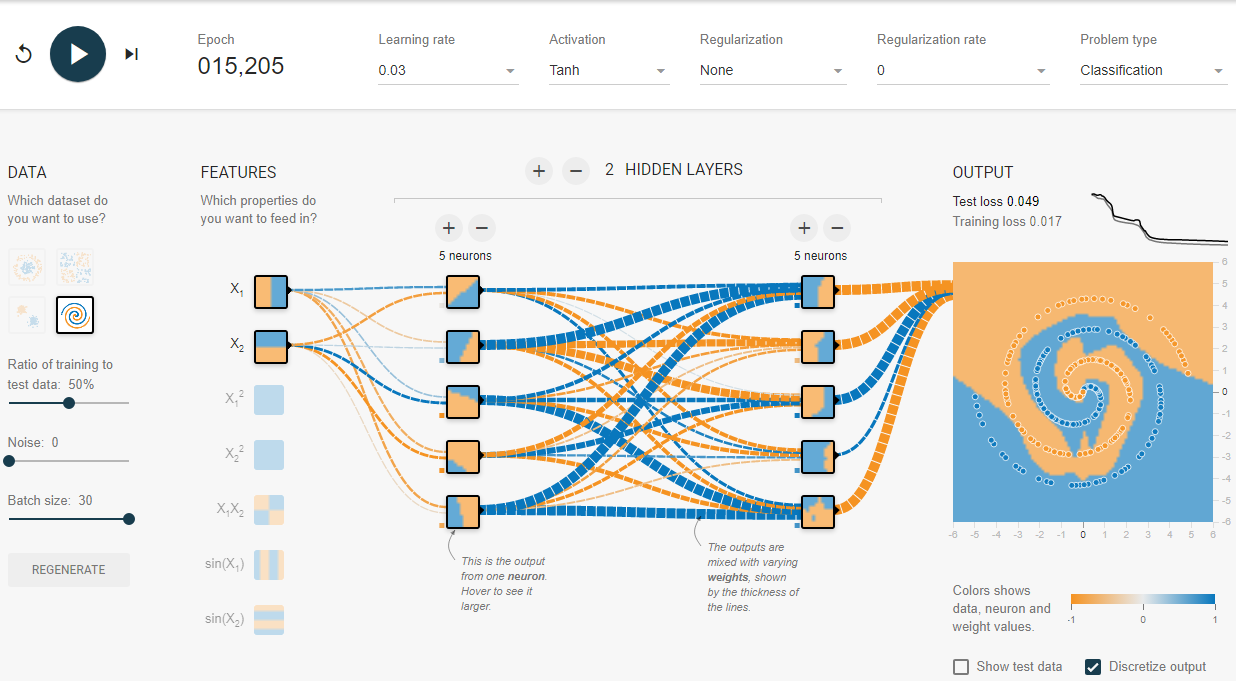

In [57]:
# Open the image file
image = Image.open("hw01_question_4_image.png")

# Show the image
display(image)

I initiated the process with a substantial neural network and progressively reduced its size until I obtained the most compact network capable of effectively distinguishing the data. Ultimately, I settled on a neural network with two hidden layers, utilizing the Tanh activation function. Although the computation time for this network was somewhat lengthy, it successfully achieved near-flawless data separation. To expedite the process, I adjusted the batch size from 10 to 30.